### Assignment 1
#### Nick Olivier
#### 09/04/18

In [65]:
# Packages
#######################################################################
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [66]:
# Define Functions
#######################################################################
def missing_by_col(pd_df, missing_vals = ['na', 'NA', 'null', 'NULL']):
    df_copy = pd_df
    colname_list = []
    missing_list = []
    not_missing_list = []
    for col in df_copy.columns:
        col_as_list = [x for x in df_copy[col]]
        num_nan = sum(pd.isnull(df_copy[col]))
        num_other_missing = len([y for y in col_as_list if y in missing_vals])
        colname_list.append(col)
        missing_list.append((num_nan + num_other_missing))
        not_missing_list.append((len(df_copy[col])) - (num_nan + num_other_missing))
    output = pd.DataFrame({'Field': colname_list,
                           'Missing_True': missing_list,
                           'Missing_False': not_missing_list})
    return output

def convert_floats_ints(pd_df, float_list, int_list):
    df_copy = pd_df
    df_copy[float_list] = df_copy[float_list].astype(float)
    df_copy[int_list] = df_copy[int_list].astype(int)
    return df_copy

### Assignment 1 Description
#### Step 1: Pick a data set from https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html and load the zillow.csv into a dataframe

In [ ]:
# Read Zillow File & Look at First Few Rows
#######################################################################
df = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/zillow.csv')
df.columns = ['Index', 'Living Space (sq ft)', 'Beds', 'Baths', 'Zip', 'Year', 'List Price ($)']
df.head(5)

#### Step 2: Clean dataframe by replacing missing data
##### Print the count missing value in each column (# of True vs # of False)
##### Convert all non categorical data to type int or float

In [27]:
missing_by_col(df)

,Field,Missing_False,Missing_True
0,Index,20,0
1,Living Space (sq ft),20,0
2,Beds,20,0
3,Baths,20,0
4,Zip,20,0
5,Year,20,0
6,List Price ($),20,0


In [30]:
df = convert_floats_ints(df, ['Beds'], [c for c in df.columns if c != 'Beds'])

#### Step 3: Find the correlation of all columns that have type int or float

In [32]:
df.corr()

,Index,Living Space (sq ft),Beds,Baths,Zip,Year,List Price ($)
Index,1.000000,0.071324,-0.049520,0.026341,-0.468281,0.161067,0.043812
Living Space (sq ft),0.071324,1.000000,0.798973,0.825679,0.333485,-0.030235,0.820899
Beds,-0.049520,0.798973,1.000000,0.741245,0.430314,-0.115121,0.588464
Baths,0.026341,0.825679,0.741245,1.000000,0.367207,0.077005,0.712438
Zip,-0.468281,0.333485,0.430314,0.367207,1.000000,-0.018947,0.444229
Year,0.161067,-0.030235,-0.115121,0.077005,-0.018947,1.000000,0.200663
List Price ($),0.043812,0.820899,0.588464,0.712438,0.444229,0.200663,1.000000


#### Step 4: Use Seaborn to plot one variable and the output to vizualize the correlation
##### Do this for 3 different variables
##### Hint: Use variables that are highly correlated to the output column

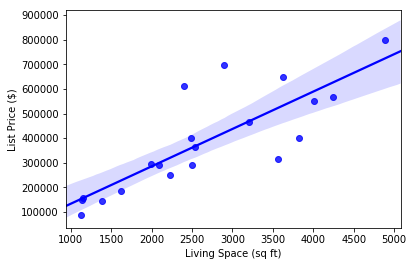

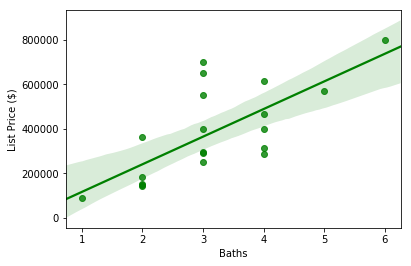

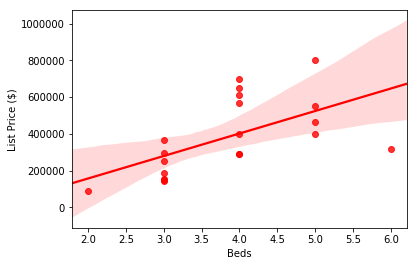

In [46]:
# List Price ~ Living Space
chart1, ax1 = plt.subplots()
sns.regplot(x = 'Living Space (sq ft)', y = 'List Price ($)', data = df, ax = ax1, color = 'blue')

# List Price ~ Baths
chart2, ax2 = plt.subplots()
sns.regplot(x = 'Baths', y = 'List Price ($)', data = df, ax = ax2, color = 'green')

# List Price ~ Beds
chart3, ax3 = plt.subplots()
sns.regplot(x = 'Beds', y = 'List Price ($)', data = df, ax = ax3, color = 'red')

plt.show()

#### Step 5: Pick a column with categorical data and create a box plot representing the unique values
##### Print all the unique values in the column
##### Create the box plot

Unique Zip Codes:
	> 32301, 32303, 32308, 32309, 32310, 32311, 32312


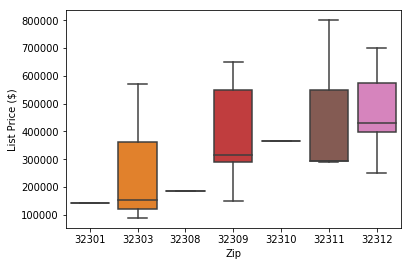

In [64]:
ax = sns.boxplot(x = 'Zip', y = 'List Price ($)', data = df)
print('Unique Zip Codes:\n\t> ' + ', '.join([str(z) for z in np.unique(df['Zip'])]))
plt.show()